In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

In [48]:
##Importing the data

data = []
expected = []

with open('pseudo_data_square.csv', newline = '') as f:
    reader = csv.reader(f, delimiter = '\t')
    for line in reader:
        data.append(np.array(line).astype(np.float)[:2])
        expected.append(np.array(line).astype(np.float)[2])

In [54]:
##Training data

data_training = [data[i] for i in range(len(data)//2)]
expected_training = [expected[i] for i in range(len(expected)//2)]

In [68]:
##Verification data

data_verify = [data[i+len(data)//2] for i in range(len(data)//2)]
expected_verify = [expected[i+len(expected)//2] for i in range(len(expected)//2)]

In [56]:
##Functions

def sigmoid(x):
    return 1/(1+np.exp(-x))

def output(weight, data):
    return sigmoid(np.inner(weight, data))

def update_weight(weight, data, expected):
    out = output(weight, data)
    up_weight = np.zeros(2)
    for i in range(2):
        up_weight[i] = weight[i] - (out - expected)*out*(1 - out)*data[i]
    return up_weight 

In [57]:
##Initial weight

initial_weight = np.array([np.random.random(), np.random.random()])
print(initial_weight)

[0.84284848 0.87012406]


In [65]:
##Training

rounds = 1000

evolution_weight = np.array([initial_weight])
evolution_output = np.transpose([[output(initial_weight, data_training[i]) for i in range(len(data_training))]])
evolution_loss = np.transpose([[(1/2)*(output(initial_weight, data_training[i]) - expected_training[i])**2 for i in range(len(data_training))]])

for i in range(rounds):
    output_vec = np.zeros(len(data_training))
    loss_vec = np.zeros(len(data_training))    
    for j in range(len(data_training)):
        evolution_weight = np.concatenate((evolution_weight, np.array([update_weight(evolution_weight[len(evolution_weight)-1], data_training[j], expected_training[j])])), axis=0)
        output_vec[j] = output(evolution_weight[len(evolution_weight)-1], data_training[j])
        loss_vec[j] = (1/2)*(output(evolution_weight[len(evolution_weight)-1], data_training[j]) - expected_training[j])**2
    evolution_output = np.concatenate((evolution_output, np.transpose([output_vec])), axis=1)
    evolution_loss = np.concatenate((evolution_loss, np.transpose([loss_vec])), axis=1)

trained weight:  [-36.77247364  36.50707685]


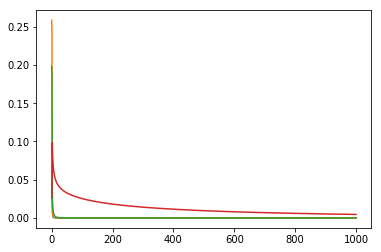

In [66]:
print('trained weight: ', evolution_weight[len(evolution_weight)-1])
plt.plot(evolution_loss[0])
plt.plot(evolution_loss[1])
plt.plot(evolution_loss[2])
plt.plot(evolution_loss[3])
plt.show()

In [74]:
##Verification

trained_weight = evolution_weight[len(evolution_weight)-1]
trained_output = np.zeros(len(expected_verify))

for j in range(len(expected_verify)):
    trained_output[j] = output(trained_weight, data_verify[j])

loss_verify = np.zeros(len(expected_verify))
for i in range(len(expected_verify)):
    loss_verify[i] = (1/2)*(trained_output[i]-expected_verify[i])**2
    

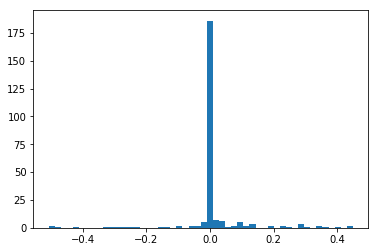

In [80]:
plt.hist(trained_output - expected_verify, bins = 50)    
plt.show()

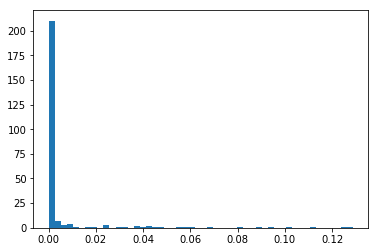

In [81]:
plt.hist(loss_verify, bins = 50)  
plt.show()